## Load Image

In [92]:
import os
import cv2

dataset_dir = 'small_dataset'

images = []
labels = []

for label_name in os.listdir(dataset_dir):
    label_path = os.path.join(dataset_dir, label_name)
    for filename in os.listdir(label_path):
        image_path = os.path.join(label_path, filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (128, 128))
        images.append(image)
        labels.append(label_name)
print("load image done\n")

load image done



## Dataset

In [93]:
import numpy as np

images = np.array(images)
flat_images = images.reshape(len(images), -1)

## PCA

In [42]:
import cv2
from skimage.feature import hog
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
features = pca.fit_transform(flat_images)

## HOG

In [70]:
import cv2
from skimage.feature import hog
import numpy as np

features = []
for image in images:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (128, 128))
    feature, _ = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
    features.append(feature)

features = np.array(features)
features = features.reshape(len(features), -1)

## Canny

In [94]:
import cv2
import numpy as np

features = []
for image in images:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.Canny(gray, threshold1=100, threshold2=200)
    feature = np.expand_dims(feature, axis=-1)
    features.append(feature)

features = np.array(features)
features = features.reshape(len(features), -1)

## Spilt

In [101]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, labels_train, labels_test = train_test_split(features,labels,test_size=0.20)

## Train

In [102]:
from sklearn.cluster import KMeans

n_clusters = 4  # You can choose this based on how many groups you expect
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(feature_train)  # output: cluster ID per image


c:\Users\VivoBook\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Confusion Matrix

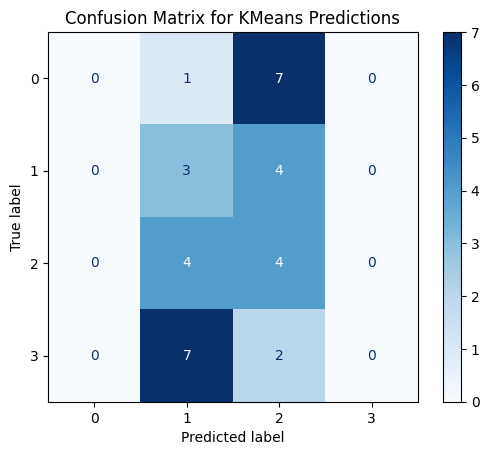

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.optimize import linear_sum_assignment
import numpy as np


test_clusters = kmeans.predict(feature_test)
labels_test = np.array(labels_test)
labels_test = [int(numeric_string) for numeric_string in labels_test]
for i in range(len(labels_test)):
    if labels_test[i] == 1:
        labels_test[i] = 0
    elif labels_test[i] == 5:
        labels_test[i] = 1
    elif labels_test[i] == 10:
        labels_test[i] = 2
    elif labels_test[i] == 50:
        labels_test[i] = 3
conf_mat = confusion_matrix(labels_test, test_clusters)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for KMeans Predictions")
plt.show()